In [1]:
import pandas as pd
import numpy as np
import pathlib
from plotnine import *
from plotnine.data import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from plotnine import *

In [2]:
users = pd.read_csv('steam_users_purchase_play.csv', header=1, names=['user', 'games', 'hours', 'purchase', 'play'])
print(users)

             user                         games  hours  purchase  play
1            5250               Cities Skylines  144.0         1     1
2            5250                Counter-Strike    0.0         1     0
3            5250         Counter-Strike Source    0.0         1     0
4            5250                 Day of Defeat    0.0         1     0
5            5250            Deathmatch Classic    0.0         1     0
...           ...                           ...    ...       ...   ...
128799  309626088  Age of Empires II HD Edition    6.7         1     1
128800  309812026  Counter-Strike Nexon Zombies    0.0         1     0
128801  309812026                     Robocraft    0.0         1     0
128802  309824202                        Dota 2    0.7         1     1
128803  309903146                        Dota 2    0.2         1     1

[128803 rows x 5 columns]


In [3]:
#Grouping users datasets in terms of hours users played in a particular game
#Considering top 20 most played games by users.
game_total_hrs = users.groupby(by='games')['hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20].reset_index()
#Game with highest number of users.
game_freq = users.groupby(by='games').agg({'user':'count', 'hours':'sum'}).reset_index()
top_20_game = game_freq.sort_values(by='user', ascending=False)[:20].reset_index()
print(top_20_game)

    index                                         games  user     hours
0    1336                                        Dota 2  4841  981684.6
1    4257                               Team Fortress 2  2323  173673.3
2    4788                                      Unturned  1563   16096.4
3     981               Counter-Strike Global Offensive  1412  322771.6
4    2074                        Half-Life 2 Lost Coast   981     184.4
5     984                         Counter-Strike Source   978   96075.5
6    2475                                 Left 4 Dead 2   951   33596.7
7     978                                Counter-Strike   856  134261.1
8    4899                                      Warframe   847   27074.6
9    2071                        Half-Life 2 Deathmatch   823    3712.9
10   1894                                   Garry's Mod   731   49725.3
11   4364                    The Elder Scrolls V Skyrim   717   70889.3
12   3562                                     Robocraft   689   

In [4]:
#Manipulating the above obtained top 20 games data.
top_20_game['hours'] = top_20_game['hours'].round(1)

1. Histogram plot for top 20 games with most users.

C:\Users\User\AppData\Local\Temp\ipykernel_5336\2443657942.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator


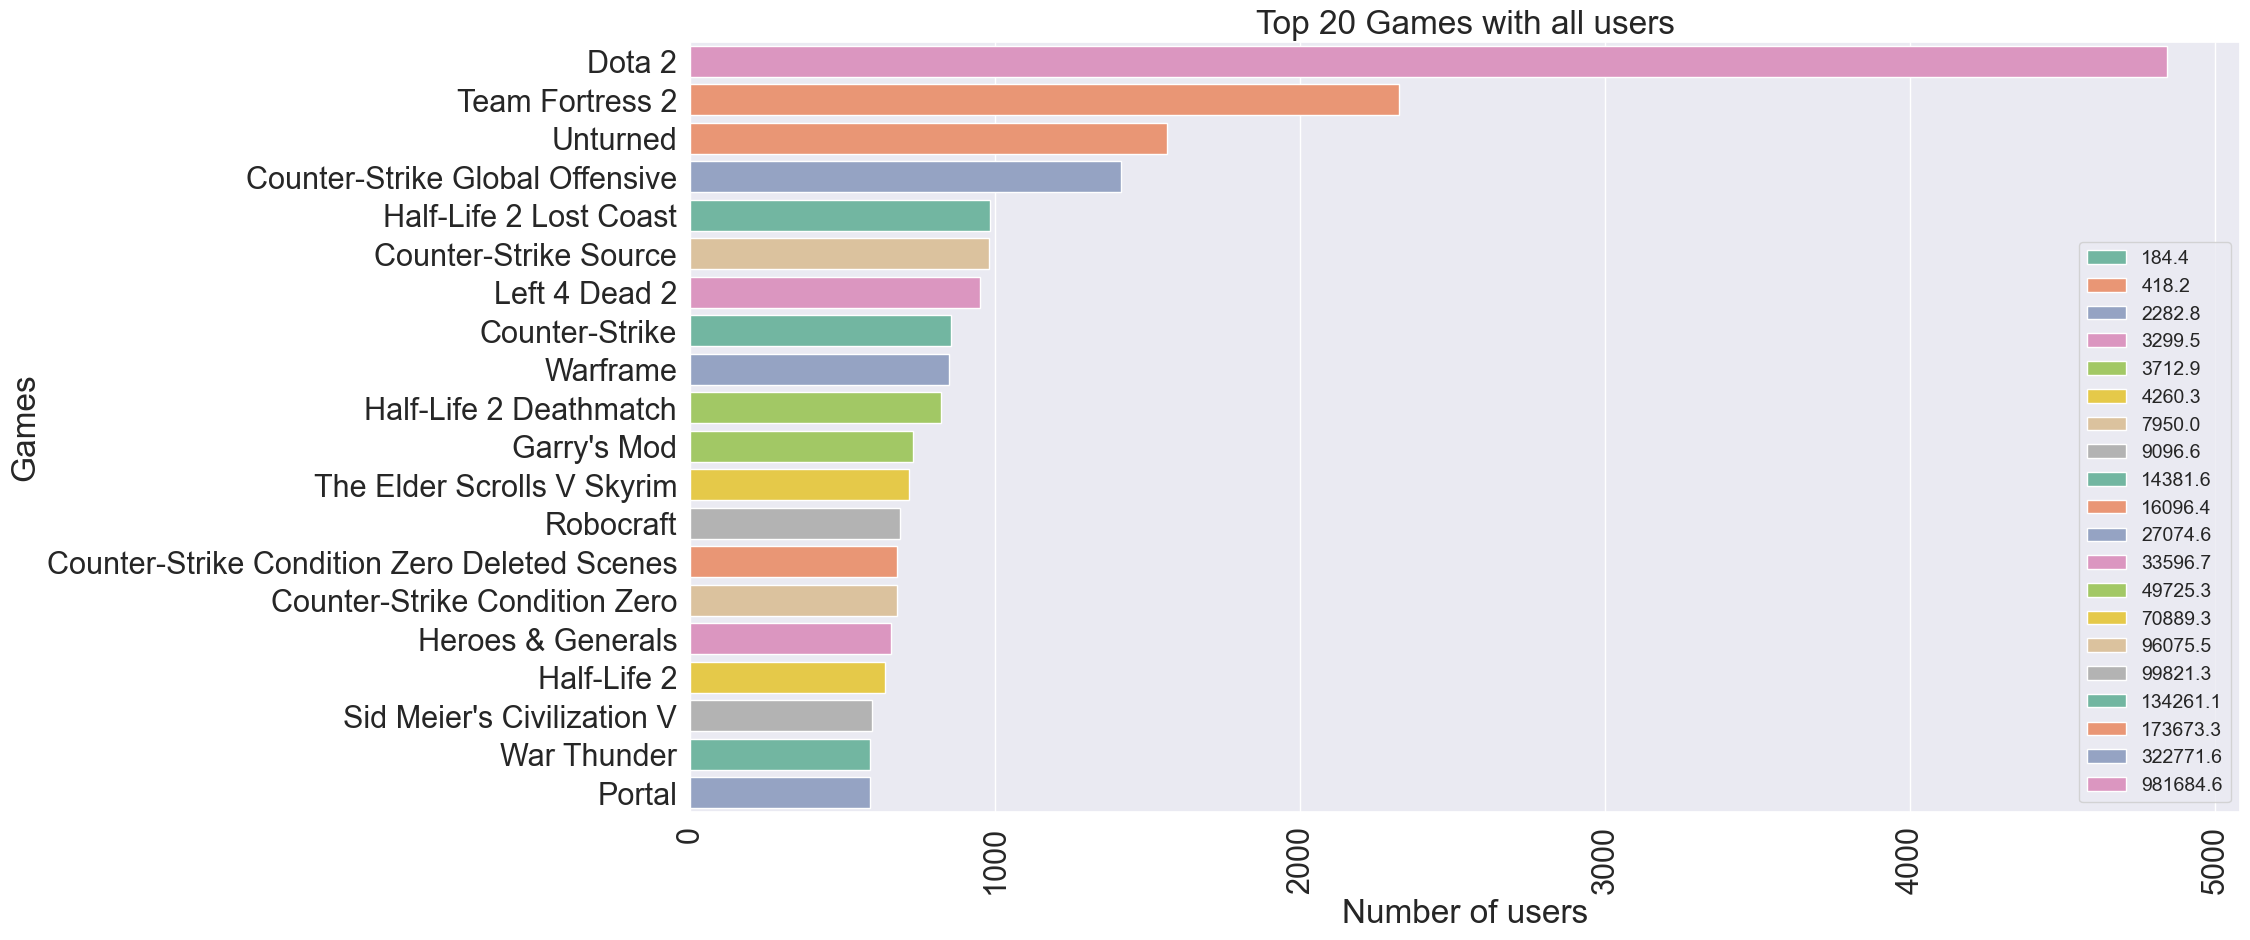

In [5]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
axis = sns.barplot(x='user', y='games', hue='hours', alpha=1, data=top_20_game, palette='Set2', dodge=False)
axis.set(xlabel='Number of users', ylabel='Games', title='Top 20 Games with all users')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
axis.legend(fontsize=14)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5336\4092227007.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator


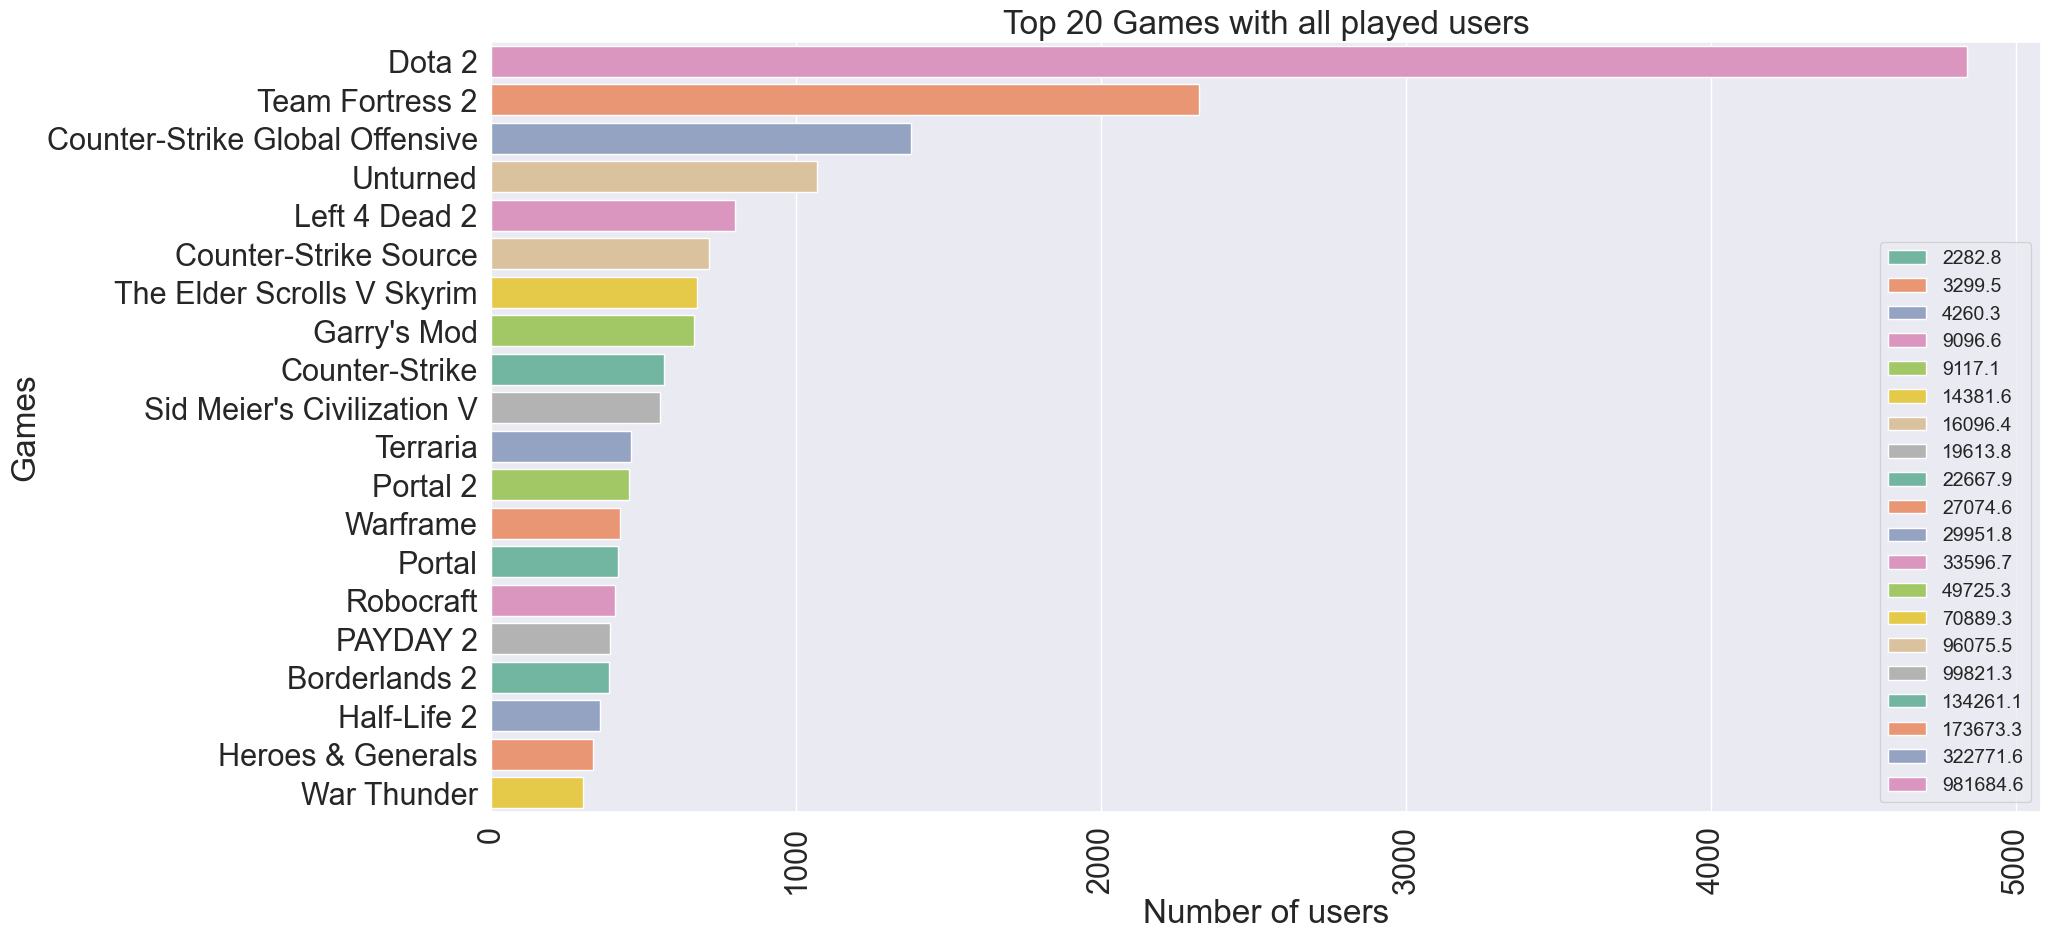

In [6]:
'''Histogram plot for top 20 games for only those users that actually played the game ,
ignoring the case that includes the user who purchased the game but never played it.'''
play_removal = users[users['play']==0].index
users.drop(play_removal, inplace=True)
game_total_hrs = users.groupby(by='games')['hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20]
#Game with highest number of users
game_freq = users.groupby(by='games').agg({'user':'count', 'hours':'sum'}).reset_index()
top_20_game1 = game_freq.sort_values(by='user', ascending=False)[:20].reset_index()
top_20_game1['hours'] = top_20_game1['hours'].round(1)
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
axis = sns.barplot(x='user', y='games', hue='hours', alpha=1, data=top_20_game1, palette='Set2', dodge=False)
axis.set(xlabel='Number of users', ylabel='Games', title='Top 20 Games with all played users')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
axis.legend(fontsize=14)
plt.show()

2. Boxplot for top 20 most played games by users.

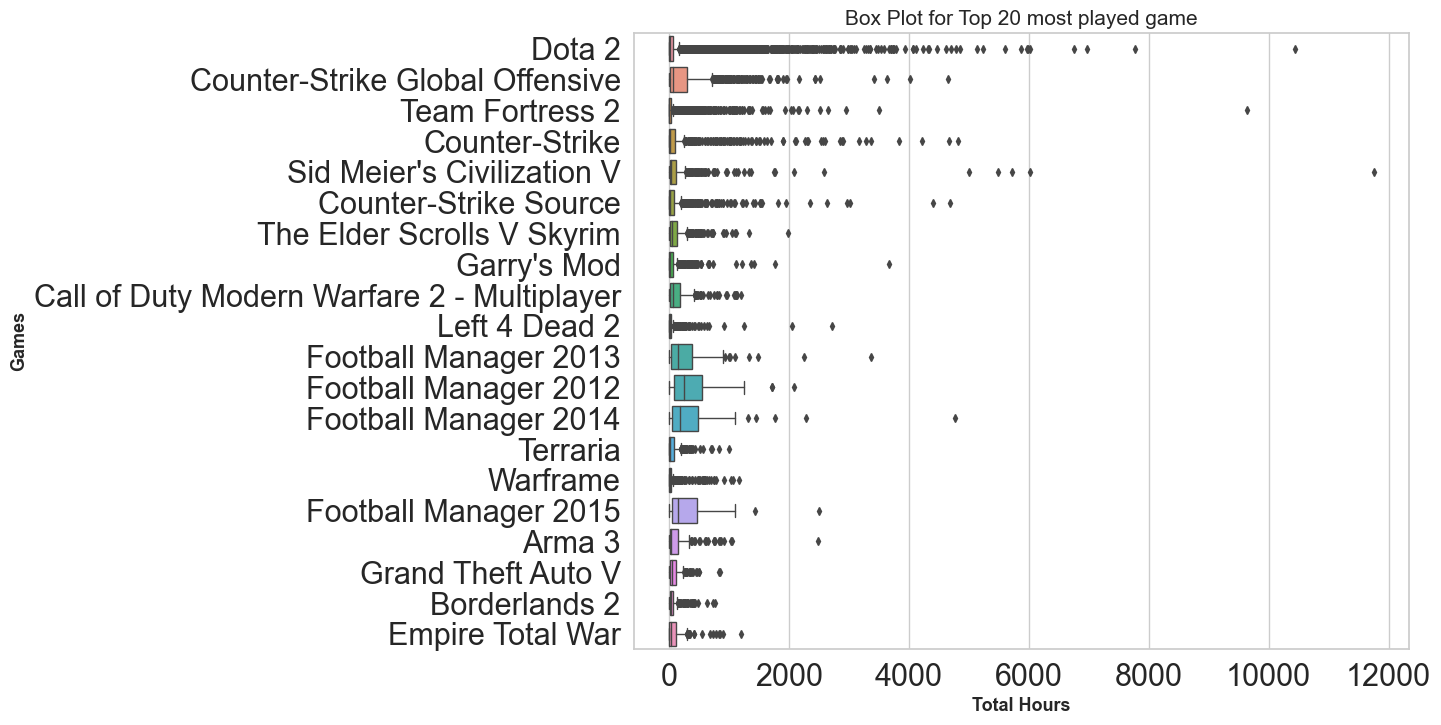

In [21]:

#Considering only the cases where users actually played the game
col = users.columns
user_col = col[0]
game_col = col[1]
hrs_col = col[2]
play_col = col[4]
user_count = users[users[play_col]==1].groupby(game_col)[user_col].agg('count').sort_values(ascending=False)
total_hrs = users[users[play_col]==1].groupby(game_col)[hrs_col].agg(np.sum).sort_values(ascending=False)
#Creating a dataframe of top most played games with total hours and total users per game
df_topmost_games = pd.DataFrame({'game':total_hrs.index,'hours_played':total_hrs.values, 'total_user':user_count.values})[0:20]
#creating masking for boxplot
mask = users[game_col].isin(df_topmost_games['game'])
df_boxplot = users.loc[mask].loc[users[play_col]==1][[hrs_col, game_col]]
fig, axis = plt.subplots(1, figsize=(10,8))
sns.set_style("whitegrid")
sns.boxplot(x=hrs_col, y=game_col, data=df_boxplot, order=df_topmost_games['game'].to_list(), linewidth=1, fliersize=4)
plt.title('Box Plot for Top 20 most played game', fontsize=15)
plt.xlabel('Total Hours', fontsize=13, fontweight='demi')
plt.ylabel('Games', fontsize=13, fontweight='demi')
plt.show()

In [25]:
df_topmost_games

,game,hours_played,total_user
0,Dota 2,981684.6,4841
1,Counter-Strike Global Offensive,322771.6,2323
2,Team Fortress 2,173673.3,1377
3,Counter-Strike,134261.1,1069
4,Sid Meier's Civilization V,99821.3,801
5,Counter-Strike Source,96075.5,715
6,The Elder Scrolls V Skyrim,70889.3,677
7,Garry's Mod,49725.3,666
8,Call of Duty Modern Warfare 2 - Multiplayer,42009.9,568
9,Left 4 Dead 2,33596.7,554


In [22]:
#Statistics Summary of top played games by users
df_stat = df_boxplot.groupby(game_col).describe().reindex(df_topmost_games['game'].to_list())
df_stat

hours                          \
                                              count        mean         std   
games                                                                         
Dota 2                                       4841.0  202.785499  600.555866   
Counter-Strike Global Offensive              1377.0  234.402033  405.569161   
Team Fortress 2                              2323.0   74.762505  310.069630   
Counter-Strike                                568.0  236.375176  618.495369   
Sid Meier's Civilization V                    554.0  180.182852  720.300743   
Counter-Strike Source                         715.0  134.371329  392.581343   
The Elder Scrolls V Skyrim                    677.0  104.710931  173.335582   
Garry's Mod                                   666.0   74.662613  209.160315   
Call of Duty Modern Warfare 2 - Multiplayer   291.0  144.363918  221.631271   
Left 4 Dead 2                                 801.0   41.943446  147.693516   
Football Manager 2013                         104.0  310.659615  472.568369   
Football Manager 2012                          79.0  390.453165  429.515311   
Football Manager 2014                          78.0  391.984615  662.970968   
Terraria                                      460.0   65.112609  110.424467   
Warframe                                      424.0   63.855189  166.159612   
Football Manager 2015                          77.0  315.364935  411.881131   
Arma 3                                        157.0  153.221019  293.210589   
Grand Theft Auto V                            269.0   85.340892  112.530400   
Borderlands 2                                 386.0   58.725130  100.276692   
Empire Total War                              214.0   98.272430  172.929822   

                                                                          \
                                             min     25%     50%     75%   
games                                                                      
Dota 2                                       0.1   1.200    5.50   69.00   
Counter-Strike Global Offensive              0.1  11.500   61.00  295.00   
Team Fortress 2                              0.1   1.000    4.40   28.00   
Counter-Strike                               0.1   1.300    8.80  101.00   
Sid Meier's Civilization V                   0.1   9.500   37.00  114.50   
Counter-Strike Source                        0.1   2.500   13.80   80.50   
The Elder Scrolls V Skyrim                   0.1   7.900   47.00  125.00   
Garry's Mod                                  0.1   4.225   17.25   63.00   
Call of Duty Modern Warfare 2 - Multiplayer  0.1   9.400   59.00  175.00   
Left 4 Dead 2                                0.1   3.100   10.50   31.00   
Football Manager 2013                        0.6  37.750  144.00  388.00   
Football Manager 2012                        0.3  76.500  247.00  552.00   
Football Manager 2014                        1.1  48.500  181.00  477.25   
Terraria                                     0.1   3.000   20.35   81.00   
Warframe                                     0.1   1.700    5.85   26.00   
Football Manager 2015                        1.5  45.000  144.00  471.00   
Arma 3                                       0.2  10.100   37.00  152.00   
Grand Theft Auto V                           0.2  17.200   49.00  106.00   
Borderlands 2                                0.2   5.800   22.00   61.75   
Empire Total War                             0.1   4.400   26.00  120.50   

                                                      
                                                 max  
games                                                 
Dota 2                                       10442.0  
Counter-Strike Global Offensive               4659.0  
Team Fortress 2                               9640.0  
Counter-Strike                                4814.0  
Sid Meier's Civilization V                   11754.0  
Counter-Strike Source                  